In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.gridspec as gridspec

import mpl_toolkits.axisartist as AA
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

In [2]:
gdp = pd.read_csv("Data/GDP.csv")
gdp = gdp.values
gdp = {"Country": gdp[:,0], "GDP": gdp[:,1].astype(np.float), "Growth": gdp[:,2].astype(np.float)}

In [3]:
consumption_over_time = pd.read_csv("Data/Consumption_over_time.csv", engine='python')
co2_over_time = pd.read_csv("Data/CO2-emmisions_per_year.csv", engine='python')
headings = ["Million tonnes oil equivalent", "Oil", "Natural Gas", "Coal", 
            "Nuclear energy", "Hydro electric", "Renewables", "Total"]

energy_type_country_2017 = pd.read_csv("Data/2017_consumption_by_type.csv", 
                                       names=headings, engine='python')
nuclear_energy_by_year = pd.read_csv("Data/Nuclear_Energy_By_Year.csv", engine='python')
consuption_by_type_2017 = pd.read_csv("Data/2017_Consumption_By_Country.csv", engine='python')
electricity_2017 = pd.read_csv("Data/Electricity_By_Country_2017.csv", engine='python')
usage_by_type = pd.read_csv("Data/Usage_By_Type.csv")

In [4]:
conv2017 = energy_type_country_2017.values
co2_time = co2_over_time.values
consumption = consumption_over_time.values
nuclear_year = nuclear_energy_by_year.values
cons2017 = consuption_by_type_2017.values
electricity_2017 = electricity_2017.values
usage_by_type = usage_by_type.values


In [5]:
Big_12 = {"Countries": ["USA", "China", "Japan", "India", "Germany", "Canada", "France", "Brazil", "S.Korea",
                        "Russia", "UK", "Mexico"],
         "Energy": [conv2017[2][1:-1], conv2017[65][1:-1], conv2017[69][1:-1], conv2017[67][1:-1], conv2017[22][1:-1],
                    conv2017[3][1:-1], conv2017[21][1:-1], conv2017[8][1:-1], conv2017[75][1:-1], conv2017[41][1:-1], 
                    conv2017[35][1:-1], conv2017[4][1:-1]],
         "Electricity": [electricity_2017[0][1:-1], electricity_2017[26][1:-1], electricity_2017[29][1:-1],
                         electricity_2017[27][1:-1], electricity_2017[6][1:-1], electricity_2017[1][1:-1],
                         electricity_2017[36][1:-1], electricity_2017[4][1:-1], electricity_2017[31][1:-1],
                         electricity_2017[15][1:-1], electricity_2017[12][1:-1], electricity_2017[2][1:-1]],
          "Emitters": [5574.86, 9632.26, 1212.07, 2504.90, 907.94, 696.67, 442.92, 1049.11, 618.66, 
                       1543.54, 581.30, 587.88],
          "Usage": [usage_by_type[1][1:], usage_by_type[0][1:], usage_by_type[4][1:], usage_by_type[2][1:], 
                    usage_by_type[6][1:], usage_by_type[7][1:], usage_by_type[11][1:], usage_by_type[5][1:],
                    usage_by_type[8][1:], usage_by_type[3][1:], usage_by_type[10][1:], usage_by_type[9][1:]],
          
         }

Usage_by_Source = {"Total": [2843.29, 10113.74, 5380.91, 1971.03, 1261.86, 1852.62, 3718.19], 
                   "Usage": ["Agriculture", "Electricity/Heat", "Industry", "Other Fuel Combustion", 
                             "Other Sectors", "Residential", "Transport"]}

Emmissions_by_source = {"Total": [5197.83, 13853.37, 7226.26, 3217.89, 2384.99, 2705.48, 5593.22],
                        "Usage": ["Agriculture", "Electricity/Heat", 
                                  "Industry", "Other Fuel Combustion", "Other Sectors", "Residential", 
                                  "Transport"]}

WORLD2017 = conv2017[82]
WORLD = {"2017": WORLD2017[1:-1], "2017": WORLD2017[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable"]}

elec = {"2017": [883.0, 5915.3, 9723.4, 2635.6, 4059.9, 2151.5, 182.6], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable", "Other"]}

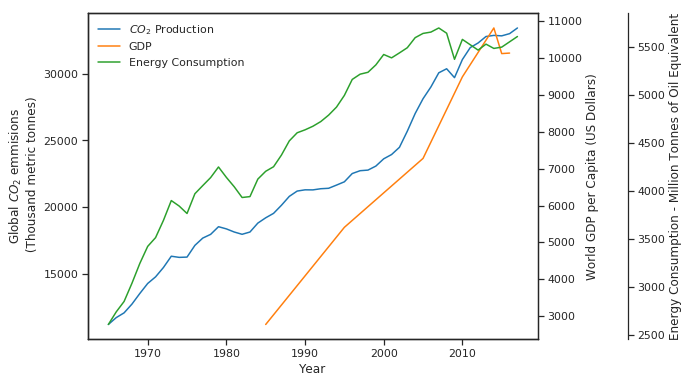

In [6]:
CO2_production = co2_time[107]
Consumption_over_time = consumption[108]


fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1965, 2018), CO2_production[1:-3], 
                color='#1f77b4', label="$CO_2$ Production")
host.set_ylabel("Global $CO_2$ emmisions\n (Thousand metric tonnes)")

p2, = par1.plot([1985, 1995, 2005, 2010, 2014, 2015,2016], 
                [2775, 5409, 7278, 9489, 10815, 10120, 10134], 
                label="GDP", color='#ff7f0e')
par1.set_ylabel("World GDP per Capita (US Dollars)")

p3, = par2.plot(np.arange(1965, 2018), Consumption_over_time[1:-3], 
                color='#2ca02c', label="Energy Consumption")
par2.set_ylabel("Energy Consumption - Million Tonnes of Oil Equivalent")

lns = [p1, p2, p3]

host.set_xlabel("Year")
host.legend(handles=lns, frameon=False)
plt.draw()
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_1.png", dpi=600)
plt.show()
plt.close()

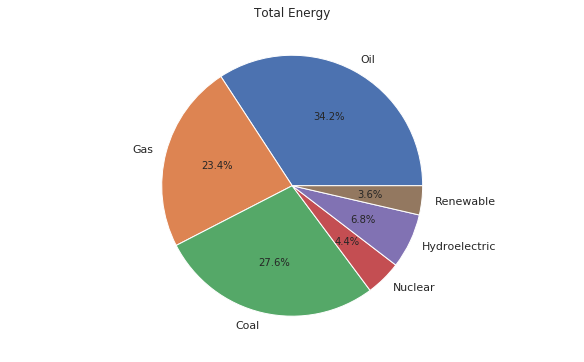

In [7]:
plt.figure(figsize=(10, 6))
plt.axis("equal")
plt.title("Total Energy")
plt.pie(WORLD["2017"], labels=WORLD["labels"], autopct="%1.1f%%")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_2.png", dpi=600)
plt.show()
plt.close()


As 70% of the worlds emissions come from 12 countries (China, USA, Japan, India, Germany, Canada, France, Brazil, South Korea, Rissia, United Kingdom and Mexico), with the remaining 30% being split between 183 countries, the following analysis will only contain data for those countries. It should be noted however that this makeup may change in the future given that the only the USA features in the list of the top 20 greenhouse gas emmitting countries per capita. So as economies grow and countries change oover the next century the global trends may change.

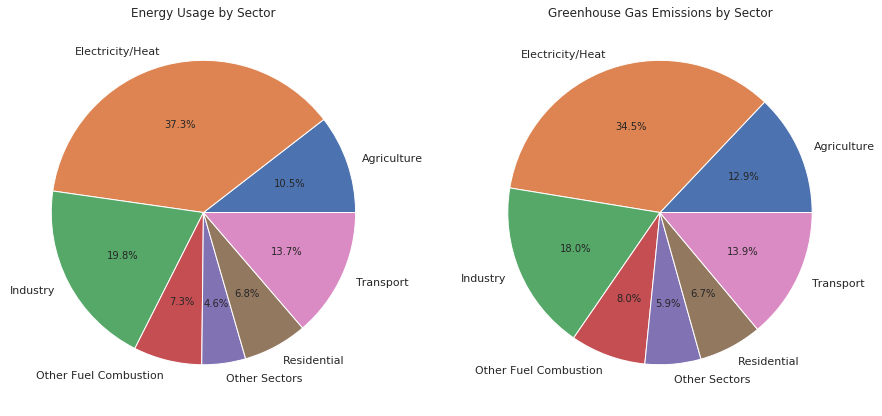

In [8]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 2)
ax1.axis("equal")
ax1.set_title("Greenhouse Gas Emissions by Sector")
ax1.pie(Emmissions_by_source["Total"], labels=Emmissions_by_source["Usage"], autopct="%1.1f%%")

ax2 = plt.subplot(1, 2, 1)
ax2.axis("equal")
ax2.set_title("Energy Usage by Sector")
ax2.pie(Usage_by_Source["Total"], labels=Usage_by_Source["Usage"], autopct="%1.1f%%")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_3.png", dpi=600)

plt.show()
plt.close()

(0.4, 0.6509803921568628, 0.11764705882352941, 1.0)


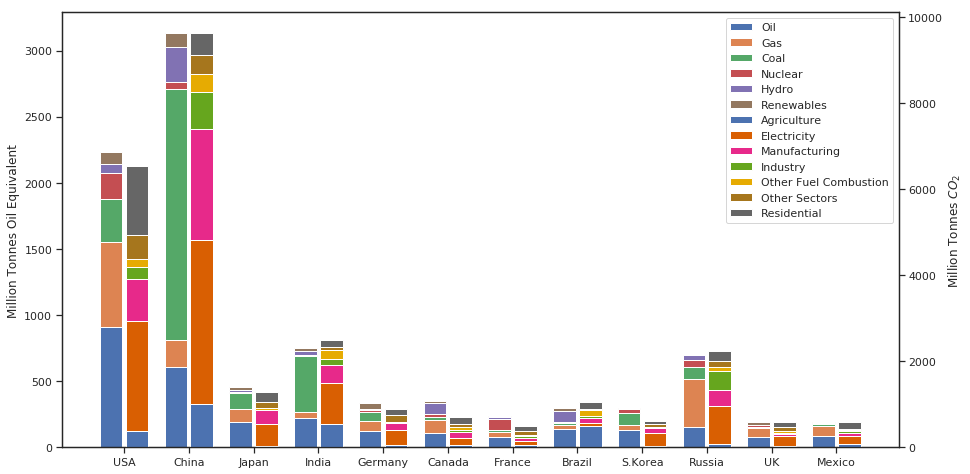

In [9]:
cmap = matplotlib.cm.get_cmap('Dark2')

rgba = cmap(0.5)
print(rgba)
x = Big_12["Energy"]
x = np.asarray(x)
x = x.astype(float)

y = Big_12['Usage']
y = np.asarray(y)
y = y.astype(float)

fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35
N = np.arange(12)


p1 = ax.bar(N - 0.2, x[:,0], width)
p2 = ax.bar(N - 0.2, x[:,1], width, bottom= x[:,0])
p3 = ax.bar(N - 0.2, x[:,2], width, bottom=(x[:,0] + x[:,1]))
p4 = ax.bar(N - 0.2, x[:,3], width, bottom=(x[:,0] + x[:,1] + x[:,2]))
p5 = ax.bar(N - 0.2, x[:,4], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3]))
p6 = ax.bar(N - 0.2, x[:,5], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4]))

ax1 = ax.twinx()
p7 = ax1.bar(N + 0.2, y[:,0], width)
p8 = ax1.bar(N + 0.2, y[:,1], width, bottom= y[:,0], color=cmap(0.2))
p9 = ax1.bar(N + 0.2, y[:,2], width, bottom=(y[:,0] + y[:,1]), color=cmap(0.4))
p10 = ax1.bar(N + 0.2, y[:,3], width, bottom=(y[:,0] + y[:,1] + y[:,2]), color=cmap(0.5))
p11 = ax1.bar(N + 0.2, y[:,4], width, bottom=(y[:,0] + y[:,1] + y[:,2] + y[:,3]), color=cmap(0.65))
p12 = ax1.bar(N + 0.2, y[:,5], width, bottom=(y[:,0] + y[:,1] + y[:,2] + y[:,3] + y[:,4]), color=cmap(0.8))
p13 = ax1.bar(N + 0.2, y[:,6], width, bottom=(y[:,0] + y[:,1] + y[:,2] + y[:,3] + y[:,4] + y[:,5]), color=cmap(1.0))

ax.set_ylabel("Million Tonnes Oil Equivalent")
ax1.set_ylabel("Million Tonnes $CO_2$")
ax.tick_params(axis='x')

plt.xticks(N, Big_12["Countries"], rotation=45, horizontalalignment="right")

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0], p12[0], p13[0]), 
           ('Oil', 'Gas', 'Coal', 'Nuclear', "Hydro", "Renewables", 
            "Agriculture", "Electricity", "Manufacturing", "Industry", 
            "Other Fuel Combustion", "Other Sectors", "Residential", "Transport"), loc=1)
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_4.png", dpi=600)

plt.show()

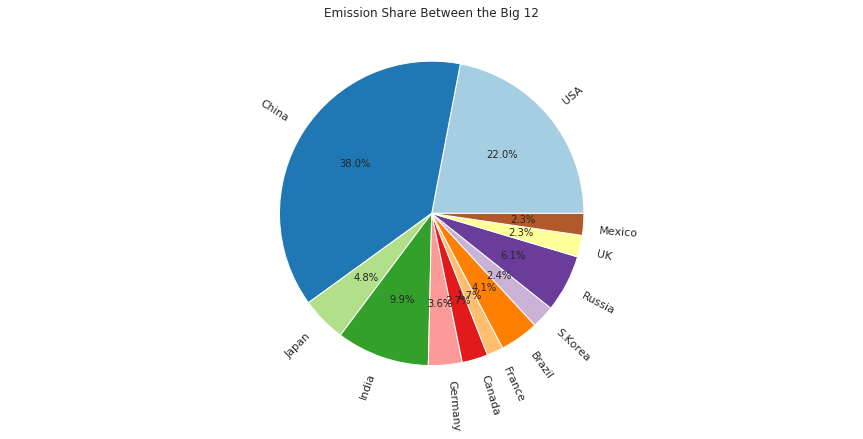

In [10]:
plt.figure(figsize=(15, 7))

plt.axis("equal")
plt.title("Emission Share Between the Big 12")
plt.pie(Big_12["Emitters"], labels=Big_12["Countries"], autopct="%1.1f%%", colors=sns.color_palette("Paired"), rotatelabels=True)
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_5.png", dpi=600)

plt.show()

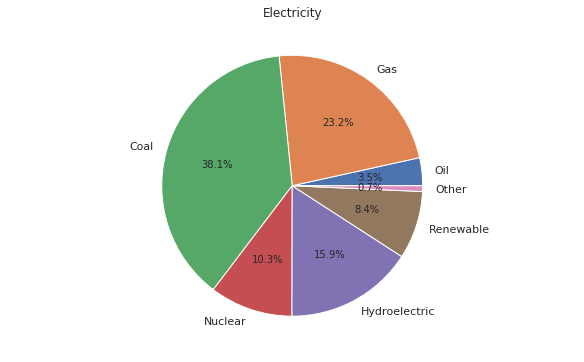

In [11]:
plt.figure(figsize=(10, 6))
plt.axis("equal")
plt.title("Electricity")
plt.pie(elec["2017"], labels=elec["labels"], autopct="%1.1f%%")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_6.png", dpi=600)
plt.show()
plt.close()


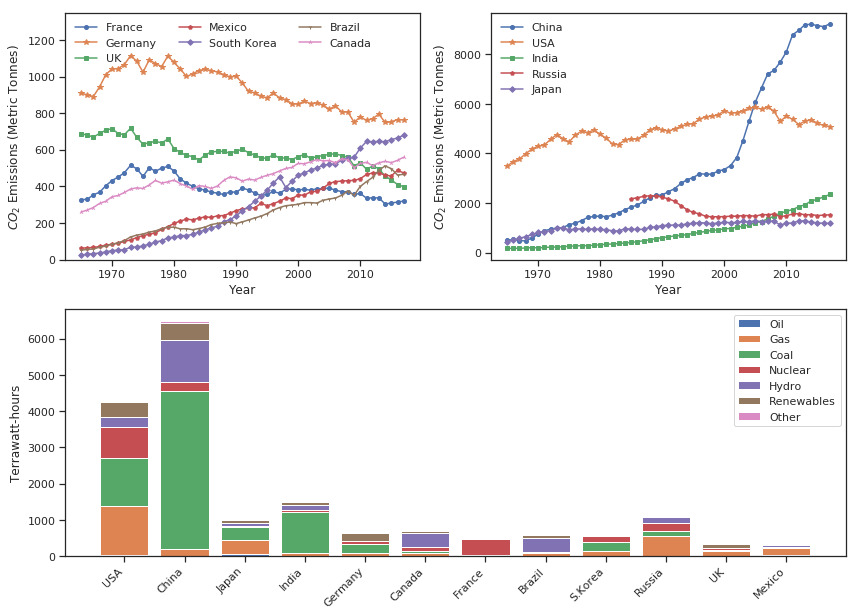

In [12]:
x = Big_12["Electricity"]
x = np.asarray(x)
x = x.astype(float)
CO2_France = co2_time[28]
CO2_Germany = co2_time[29]
CO2_UK = co2_time[50]
CO2_Mexico = co2_time[3]
CO2_SK = co2_time[99]
CO2_China = co2_time[89]
CO2_USA = co2_time[1]
CO2_India = co2_time[91]
CO2_Russia = co2_time[57]
CO2_Japan = co2_time[93]
CO2_Brazil = co2_time[7]
CO2_Canada = co2_time[2]
Time = np.arange(1965, 2018)


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(14, 10))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns


ax1.plot(Time, CO2_France[1:-3], label="France", marker="o", markersize=4)
ax1.plot(Time, CO2_Germany[1:-3], label="Germany", marker="*")
ax1.plot(Time, CO2_UK[1:-3], label="UK", marker="s", markersize=4)
ax1.plot(Time, CO2_Mexico[1:-3], label="Mexico", marker="p", markersize=4)
ax1.plot(Time, CO2_SK[1:-3], label="South Korea", marker="D", markersize=4)
ax1.plot(Time, CO2_Brazil[1:-3], label="Brazil", marker="1", markersize=4)
ax1.plot(Time, CO2_Canada[1:-3], label="Canada", marker="2", markersize=4)
ax1.set_ylabel("$CO_2$ Emissions (Metric Tonnes)")
ax1.set_xlabel("Year")
ax1.set_ylim(0, 1350)
ax1.legend(frameon=False, ncol=3, loc=2)

ax2.plot(Time, CO2_China[1:-3], label="China", marker="o", markersize=4)
ax2.plot(Time, CO2_USA[1:-3], label="USA", marker="*")
ax2.plot(Time, CO2_India[1:-3], label="India", marker="s", markersize=4)
ax2.plot(Time, CO2_Russia[1:-3], label="Russia", marker="p", markersize=4)
ax2.plot(Time, CO2_Japan[1:-3], label="Japan", marker="D", markersize=4)
ax2.set_ylabel("$CO_2$ Emissions (Metric Tonnes)")
ax2.set_xlabel("Year")
ax2.legend(frameon=False)

width = 0.8
N = np.arange(12)


p1 = ax3.bar(N, x[:,0], width)
p2 = ax3.bar(N, x[:,1], width, bottom= x[:,0])
p3 = ax3.bar(N, x[:,2], width, bottom=(x[:,0] + x[:,1]))
p4 = ax3.bar(N, x[:,3], width, bottom=(x[:,0] + x[:,1] + x[:,2]))
p5 = ax3.bar(N, x[:,4], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3]))
p6 = ax3.bar(N, x[:,5], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4]))
p7 = ax3.bar(N, x[:,6], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5]))


ax3.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), 
           ('Oil', 'Gas', 'Coal', 'Nuclear', "Hydro", "Renewables", "Other"))
plt.xticks(N, Big_12["Countries"], rotation=45, horizontalalignment="right")
ax3.tick_params(axis='x')
ax3.set_ylabel("Terrawatt-hours")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_7.png", dpi=600)

plt.show()

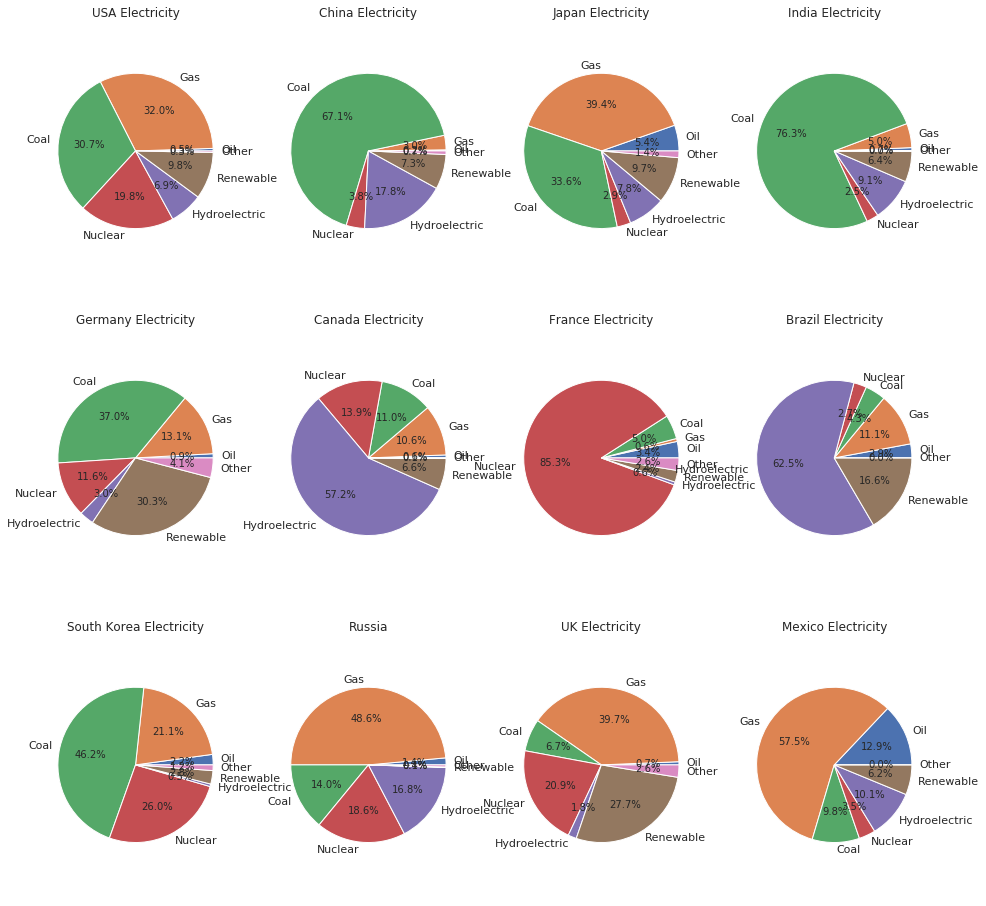

In [13]:
Energy_labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]
Elec_labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable", "Other"]

plt.figure(figsize=(16, 16))

ax2 = plt.subplot(3, 4, 1)
ax2.axis("equal")
ax2.set_title("USA Electricity")
ax2.pie(Big_12["Electricity"][0], labels=Elec_labels, autopct="%1.1f%%")

ax4 = plt.subplot(3, 4, 2)
ax4.axis("equal")
ax4.set_title("China Electricity")
ax4.pie(Big_12["Electricity"][1], labels=Elec_labels, autopct="%1.1f%%")

ax6 = plt.subplot(3, 4, 3)
ax6.axis("equal")
ax6.set_title("Japan Electricity")
ax6.pie(Big_12["Electricity"][2], labels=Elec_labels, autopct="%1.1f%%")

ax8 = plt.subplot(3, 4, 4)
ax8.axis("equal")
ax8.set_title("India Electricity")
ax8.pie(Big_12["Electricity"][3], labels=Elec_labels, autopct="%1.1f%%")

ax10 = plt.subplot(3, 4, 5)
ax10.axis("equal")
ax10.set_title("Germany Electricity")
ax10.pie(Big_12["Electricity"][4], labels=Elec_labels, autopct="%1.1f%%")

ax12 = plt.subplot(3, 4, 6)
ax12.axis("equal")
ax12.set_title("Canada Electricity")
ax12.pie(Big_12["Electricity"][5], labels=Elec_labels, autopct="%1.1f%%")

ax14 = plt.subplot(3, 4, 7)
ax14.axis("equal")
ax14.set_title("France Electricity")
ax14.pie(Big_12["Electricity"][6], labels=Elec_labels, autopct="%1.1f%%")

ax16 = plt.subplot(3, 4, 8)
ax16.axis("equal")
ax16.set_title("Brazil Electricity")
ax16.pie(Big_12["Electricity"][7], labels=Elec_labels, autopct="%1.1f%%")

ax18 = plt.subplot(3, 4, 9)
ax18.axis("equal")
ax18.set_title("South Korea Electricity")
ax18.pie(Big_12["Electricity"][8], labels=Elec_labels, autopct="%1.1f%%")

ax20 = plt.subplot(3, 4, 10)
ax20.axis("equal")
ax20.set_title("Russia")
ax20.pie(Big_12["Electricity"][9], labels=Elec_labels, autopct="%1.1f%%")

ax22 = plt.subplot(3, 4, 11)
ax22.axis("equal")
ax22.set_title("UK Electricity")
ax22.pie(Big_12["Electricity"][10], labels=Elec_labels, autopct="%1.1f%%")

ax24 = plt.subplot(3, 4, 12)
ax24.axis("equal")
ax24.set_title("Mexico Electricity")
ax24.pie(Big_12["Electricity"][11], labels=Elec_labels, autopct="%1.1f%%")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_8.png", dpi=600)

plt.show()

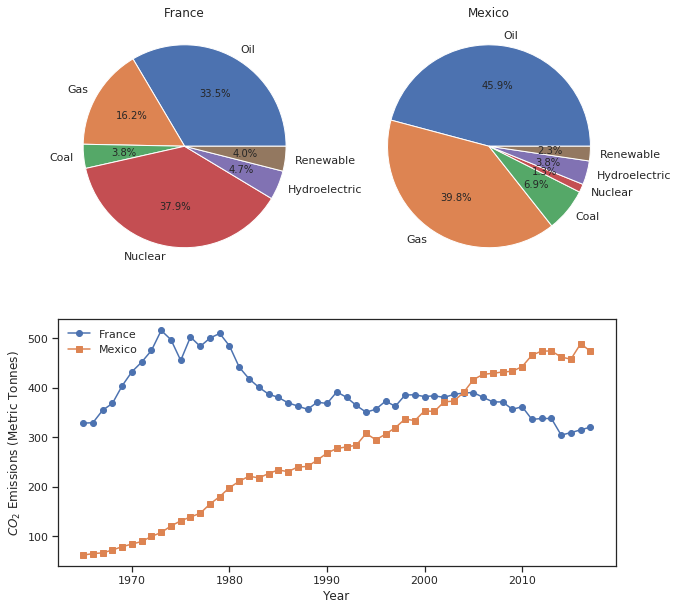

In [14]:


plt.figure(figsize=(10, 10))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns

ax1.axis("equal")
ax1.set_title("France")
ax1.pie(Big_12["Energy"][6], labels=Energy_labels, autopct="%1.1f%%")

ax2.axis("equal")
ax2.set_title("Mexico")
ax2.pie(Big_12["Energy"][11], labels=Energy_labels, autopct="%1.1f%%")

ax3.plot(Time, CO2_France[1:-3], label="France", marker="o")
ax3.plot(Time, CO2_Mexico[1:-3], label="Mexico", marker="s")
ax3.set_ylabel("$CO_2$ Emissions (Metric Tonnes)")
ax3.set_xlabel("Year")
ax3.legend(frameon=False)

plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_10.png", dpi=600)

plt.show()

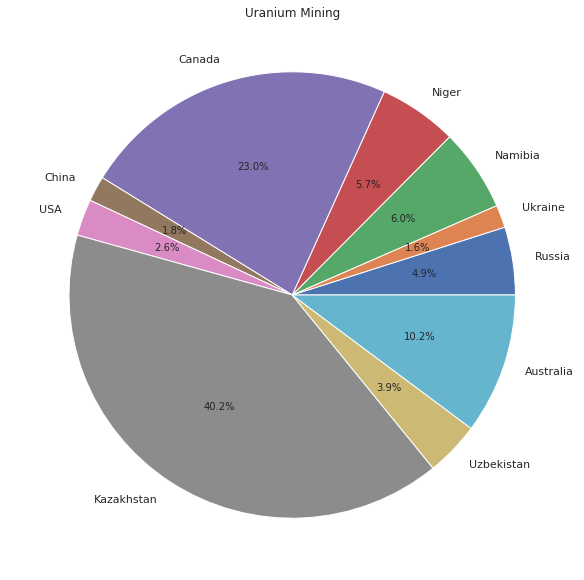

In [15]:
uranium_mining = {"Tonnes": [3005, 1005, 3657, 3478, 14037, 1123,
                             1616, 24575, 2404, 6234], 
       "labels": ["Russia", "Ukraine", "Namibia", "Niger", 
                  "Canada", "China", "USA", "Kazakhstan", 
                  "Uzbekistan", "Australia"]}

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Uranium Mining")
ax.pie(uranium_mining["Tonnes"], labels=uranium_mining["labels"], autopct="%1.1f%%")
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_11.png")

plt.show()

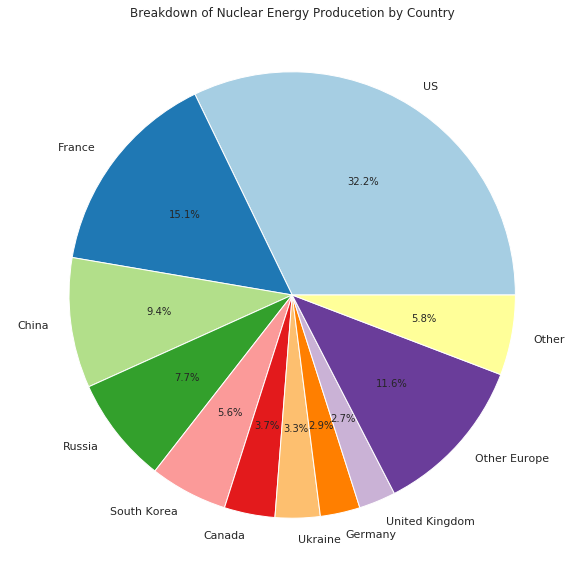

In [16]:
Total_Generation = np.array([847.3, 398.4, 248.3, 203.1, 148.4, 96.7, 85.6, 75.9, 70.3, 306.11, 152.77])
Countries = np.array(["US", "France", "China", "Russia", "South Korea", "Canada", "Ukraine", 
                      "Germany", "United Kingdom", "Other Europe", "Other"])

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Breakdown of Nuclear Energy Producetion by Country")
ax.pie(Total_Generation, labels=Countries, autopct="%1.1f%%", colors=sns.color_palette("Paired"))
plt.savefig("../Thesis/Outputs/Energy_Analysis/Figure_12.png")

plt.show()